In [37]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import warnings



warnings.filterwarnings('ignore')



def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
def preprocessing(data):
    
    Pclass = data['Pclass']
    Pclass = normalize(Pclass)
    
    Sex = data['Sex']
    Sex[Sex == "male"] = 0
    Sex[Sex == "female"] = 1
    
    Age = data['Age']
    Age[Age.isnull()] = np.nanmean(Age)
    Age = normalize(Age)
    
    SibSp = normalize(data['SibSp'])
    
    Parch = normalize(data['Parch'])
    
    Fare = data['Fare']
    Fare[Fare.isnull()] = np.nanmean(Fare)
    Fare = normalize(Fare)
    
    Embarked = data['Embarked']
    Embarked[Embarked == 'C'] = 0
    Embarked[Embarked == 'Q'] = 1
    Embarked[Embarked == 'S'] = 2
    
    Embarked[Embarked.isnull()] = -1
        
    X = np.array([Pclass,Sex,Age,SibSp,Parch,Fare,Embarked])
    
    return(X.T)



X = preprocessing(data_train)
X = np.asarray(X).astype('float32')
y = np.array(data_train['Survived'])

X_test = preprocessing(data_test)
X_test = np.asarray(X_test).astype('float32')


In [34]:
model = Sequential()

model.add(Dense(7, input_shape=(7,), activation='sigmoid'))

for i in range(5):
    model.add(Dense(7))
    model.add(Dropout(0.2))
        
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

#model.summary()

Epoch 1/30
90/90 [==============================] - 1s 1ms/step - loss: 0.7171 - accuracy: 0.5342
Epoch 2/30
90/90 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.6195
Epoch 3/30
90/90 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.6150
Epoch 4/30
90/90 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.6431
Epoch 5/30
90/90 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6543
Epoch 6/30
90/90 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.6936
Epoch 7/30
90/90 [==============================] - 0s 1ms/step - loss: 0.5818 - accuracy: 0.7003
Epoch 8/30
90/90 [==============================] - 0s 1ms/step - loss: 0.5626 - accuracy: 0.7374
Epoch 9/30
90/90 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.7688
Epoch 10/30
90/90 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.7688
Epoch 11/30
90/90 [

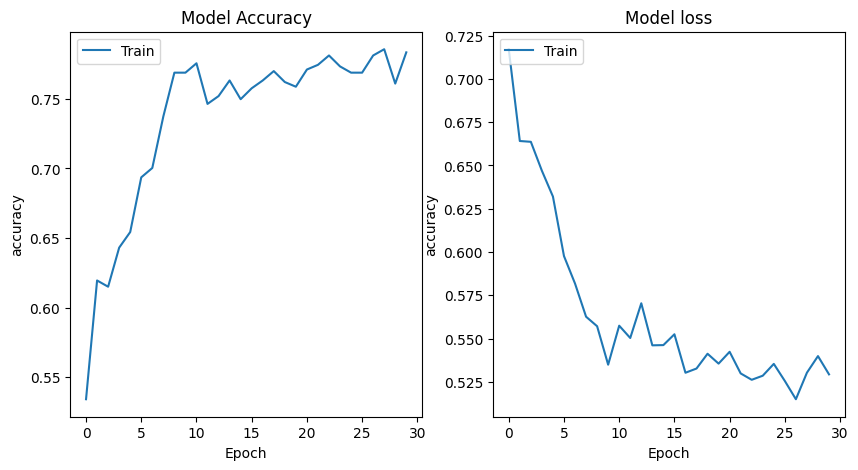

In [35]:
history = model.fit(
    X,
    y,
    batch_size=10,
    epochs=30,
)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history.history['accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 

plt.subplot(122)
plt.plot(history.history['loss']) 
plt.title('Model loss') 
plt.ylabel('accuracy') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()


In [16]:
yhat = model.predict(X_test)
for i in range(len(yhat)):
    if yhat[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
        
print(X)     



14/14 [==============================] - 0s 914us/step
[[0.04093489 0.         0.02273542 ... 0.         0.00410328 2.        ]
 [0.01364497 1.         0.03927028 ... 0.         0.04034417 0.        ]
 [0.04093489 1.         0.02686914 ... 0.         0.00448531 2.        ]
 ...
 [0.04093489 1.         0.03069191 ... 0.0751646  0.01327198 2.        ]
 [0.01364497 0.         0.02686914 ... 0.         0.01697908 0.        ]
 [0.04093489 0.         0.03306971 ... 0.         0.00438626 1.        ]]
